In [2]:
#Paso 1 carga de las librerias necesarias

import numpy as np
import pandas as pd


# VISUALIZACION DE DATOS
import matplotlib.pyplot as plt
import seaborn as sns

# ESTADISTICAS
from statsmodels.graphics.gofplots import qqplot
# Esta funcion compara la distribucion de la muestra con una distribucion normal, 
# para comprobar si tu muestra se distribuye normalmente o no.

In [3]:
# Paso 2 - Cargar los datos y obtener una vista previa
dfcatalogo = pd.read_csv(r'C:\Users\oomph\Documents\Henry Data Science\Proyecto Individual V1\df_catalogo_v2.csv')
print(dfcatalogo.head())


  show_id   type                 title        director  \
0      s1  movie   the grand seduction    don mckellar   
1      s2  movie  take care good night    girish joshi   
2      s3  movie  secrets of deception     josh webber   
3      s4  movie    pink: staying true  sonia anderson   
4      s5  movie         monster maker    giles foster   

                                                cast         country  \
0     brendan gleeson, taylor kitsch, gordon pinsent          canada   
1   mahesh manjrekar, abhay mahajan, sachin khedekar           india   
2  tom sizemore, lorenzo lamas, robert lasardo, r...   united states   
3  interviews with: pink, adele, beyoncé, britney...   united states   
4  harry dean stanton, kieran o'brien, george cos...  united kingdom   

   date_added  release_year rating duration                listed_in  \
0  2021-03-30          2014      g  113 min            comedy, drama   
1  2021-03-30          2018    13+  110 min     drama, international   
2 

In [4]:
# Paso 3 - Identificar patrones y calidad de los datos
print(dfcatalogo.info())
print(dfcatalogo.describe())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22998 entries, 0 to 22997
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   show_id        22998 non-null  object 
 1   type           22998 non-null  object 
 2   title          22998 non-null  object 
 3   director       14739 non-null  object 
 4   cast           17677 non-null  object 
 5   country        11499 non-null  object 
 6   date_added     13444 non-null  object 
 7   release_year   22998 non-null  int64  
 8   rating         22998 non-null  object 
 9   duration       22516 non-null  object 
 10  listed_in      22998 non-null  object 
 11  description    22994 non-null  object 
 12  plataforma     22998 non-null  object 
 13  movieId        22998 non-null  object 
 14  duration_int   22516 non-null  float64
 15  duration_type  22516 non-null  object 
 16  avg_rating     22998 non-null  float64
dtypes: float64(2), int64(1), object(14)
memory usage: 

In [5]:
dfcatalogo.sample(10)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,plataforma,movieId,duration_int,duration_type,avg_rating
20622,s6432,movie,cat on a hot tin roof,richard brooks,"elizabeth taylor, paul newman, burl ives, jack...",united states,2019-11-01,1958,nr,108 min,"classic movies, dramas",members of a southern clan scramble to curry f...,netflix,ns6432,108.0,min,3.494726
6295,s6296,movie,the healing garden,joseph granda,"danny mann, kyriana kratter, redmond ramos, ja...",NaN,NaN,2021,g,96 min,"drama, special interest",an aging military chaplain and a young girl fr...,amazon,as6296,96.0,min,3.450884
15242,s1052,tv show,sonic x,NaN,"junichi kanemaru, sanae kobayashi, ryo hirohas...",japan,2021-04-15,2003,tv-y7,2 seasons,"anime series, kids' tv",a mission gone awry transports sonic the hedge...,netflix,ns1052,2.0,seasons,3.574903
12461,s1344,tv show,let's be real,NaN,NaN,NaN,2020-10-02,2020,tv-14,1 season,comedy,satirical puppet series covering politics and ...,hulu,hs1344,1.0,season,3.522417
4644,s4645,movie,premonition,gavin wilding,"cynthia preston, adrian paul, christopher lloyd",NaN,NaN,2000,r,94 min,suspense,a young journalist is assigned to work with a ...,amazon,as4645,94.0,min,3.466734
18751,s4561,movie,bathinda express,deep joshi,"deep joshi, jasmine kaur, mohit bhaskar, vijay...",india,2018-10-01,2016,tv-14,118 min,"dramas, international movies, sports movies",an ambitious young athlete endeavors to revive...,netflix,ns4561,118.0,min,3.520921
2337,s2338,movie,gladiators of rome,iginio straffi,"john schwab, flaminia fegarotti, emma tate",NaN,NaN,2012,pg,94 min,"animation, comedy",a hero is born in this animated adventure! tim...,amazon,as2338,94.0,min,3.571134
18177,s3987,tv show,the oa,NaN,"brit marling, jason isaacs, emory cohen, scott...",united states,2019-03-22,2019,tv-ma,2 seasons,"tv dramas, tv mysteries, tv sci-fi & fantasy","seven years after vanishing from her home, a y...",netflix,ns3987,2.0,seasons,3.566860
22792,s8602,movie,tokyo idols,kyoko miyake,NaN,"united kingdom, canada, japan",2017-10-01,2017,tv-14,89 min,"documentaries, international movies, music & m...",this documentary follows j-pop idol rio and he...,netflix,ns8602,89.0,min,3.517276
11329,s212,movie,on chesil beach,NaN,NaN,NaN,2021-09-16,2018,r,110 min,"cooking & food, drama, lifestyle & culture","in 1962, newlyweds edward and florence, both i...",hulu,hs212,110.0,min,3.498988


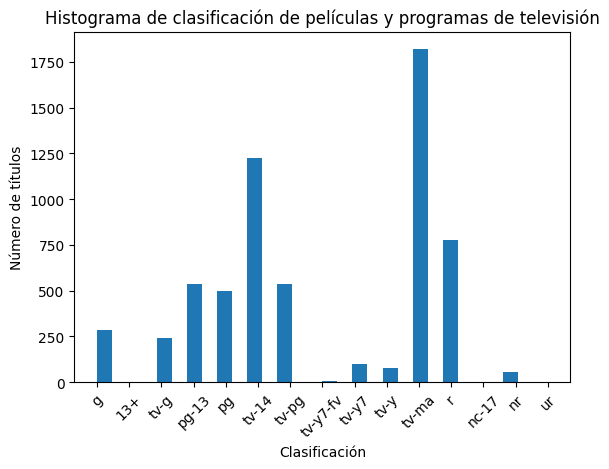

In [10]:
# Paso 4 - Visualización de datos
# Histograma
# Crear lista de etiquetas y ubicaciones para el eje X
etiquetas = dfcatalogo['rating'].unique()
ubicaciones = range(len(etiquetas))

# Crear histograma para la variable rating
plt.hist(dfcatalogo['rating'], bins=30)
plt.xlabel('Clasificación')
plt.ylabel('Número de títulos')
plt.title('Histograma de clasificación de películas y programas de televisión')

# Establecer etiquetas personalizadas y ubicaciones en el eje X
plt.xticks(ubicaciones, etiquetas, rotation=45)
plt.subplots_adjust(bottom=0.15)

# Mostrar visualización
plt.show()

In [7]:
# Paso 5 - Limpieza de datos
dfcatalogo.drop_duplicates(inplace = True)
dfcatalogo.dropna(inplace = True)



C:\Users\oomph\AppData\Local\Temp\ipykernel_10768\3589542797.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = dfcatalogo.corr()


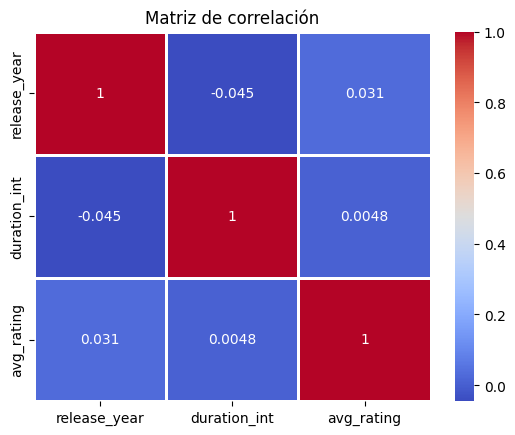

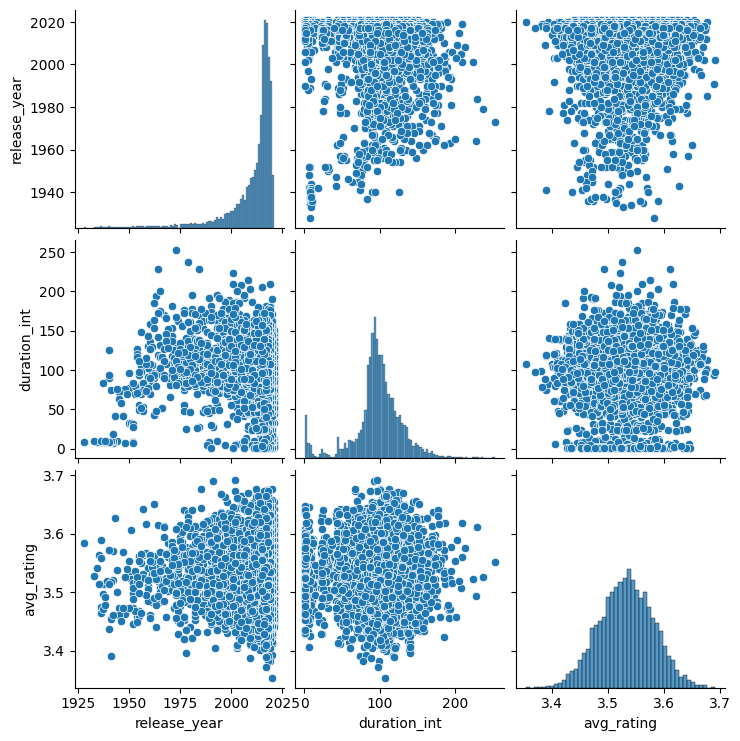

In [8]:
# Paso 6 - Identificar relaciones y patrones
# Matriz de correlación
corr = dfcatalogo.corr()

# Mostrar una heatmap para la matriz de correlación
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=1)
plt.title('Matriz de correlación')
plt.show()

# Grafico de dispersión de todas las variables
sns.pairplot(dfcatalogo)


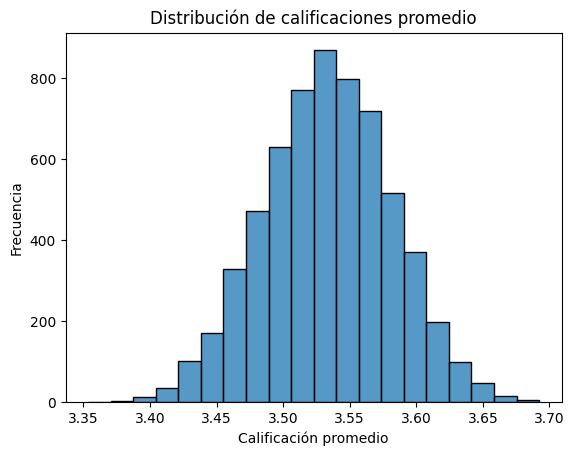

Hay 3085 títulos populares y 3082 títulos no populares.
Los géneros más populares son:
dramas, international movies                        168
stand-up comedy                                     140
comedies, dramas, international movies              134
dramas, independent movies, international movies    116
children & family movies, comedies                   92
comedies, international movies                       84
dramas, international movies, romantic movies        83
comedies, international movies, romantic movies      79
documentaries                                        78
children & family movies                             78
Name: listed_in, dtype: int64
Los directores más populares son:
marcus raboy              10
robert vince              10
martin scorsese            8
paul hoen                  8
raúl campos, jan suter     8
john lasseter              8
jay karas                  7
cathy garcia-molina        6
norman tokar               6
yılmaz erdoğan             6

In [18]:
# Paso 7 - Validar la hipótesis: Hipótesis sobre la popularidad del contenido: Basándose en los valores de la columna avg_rating, 
# podríamos hipotetizar que la mayoría del contenido es medianamente popular, con un pequeño número de títulos muy populares y 
#otro pequeño número de títulos muy impopulares. También se podría hipotetizar que hay ciertos géneros o directores que son más 
#populares que otros.

# Graficar histograma de las calificaciones promedio
sns.histplot(data=dfcatalogo, x="avg_rating", bins=20)
plt.xlabel("Calificación promedio")
plt.ylabel("Frecuencia")
plt.title("Distribución de calificaciones promedio")
plt.show()

# Calcular la mediana de las calificaciones promedio
mediana_rating = dfcatalogo["avg_rating"].median()

# Contar los títulos con calificación alta (>= mediana) y baja (< mediana)
num_titulos_populares = dfcatalogo[dfcatalogo["avg_rating"] >= mediana_rating].shape[0]
num_titulos_no_populares = dfcatalogo[dfcatalogo["avg_rating"] < mediana_rating].shape[0]
print("Hay {} títulos populares y {} títulos no populares.".format(num_titulos_populares, num_titulos_no_populares))

# Identificar géneros más populares
generos_populares = dfcatalogo[dfcatalogo["avg_rating"] >= mediana_rating]["listed_in"].value_counts().head(10)
print("Los géneros más populares son:")
print(generos_populares)

# Identificar directores más populares
directores_populares = dfcatalogo[dfcatalogo["avg_rating"] >= mediana_rating]["director"].value_counts().head(10)
print("Los directores más populares son:")
print(directores_populares)